In [334]:
# Pressão média de trabalho em metros (m)
Hm = 20

# Espaçamento em metro (m)
s = 3.5

# diamentro interno do tubo em milímetros (mm)
di = 12

In [335]:
# Expoente de descarga (x) , Equação do emissor e vazão na pressão de trabalho (qm)

k = 26.082
x = 0.5358 

qm = (k * Hm ** x)

print(round(qm, 2), ('l/h'))

129.85 l/h


In [336]:
#Perda de carga admissível máxima (10%) em metros(m)

hfmax = 0.1 * Hm/x 

print(round(hfmax, 2), 'm')

3.73 m


In [337]:
# Fator de correção aproximado -> Tubo de Polietileno liso m = 1.75

m = 1.75 
Fce = 1 / (m + 1)

round(Fce, 3)

0.364

In [338]:
# Comprimento Máximo teórico

L = (( hfmax /(46.5 * 10 ** -2)) * (( s / qm) ** 1.75 )* ((di ** 4.75)/ Fce)) ** (1 / 2.75)

print(round(L, 2),'m')

22.6 m


In [339]:
# Ajuste do espaçamento e número de emissores (n) 

n = int(L / s)
ni = L / s

print(n, 'emissores'),
print('(', ni, ')')

6 emissores
( 6.456231814196414 )


In [340]:
# Comprimento ajustado em metros (m)

La = n * s
print(La, 'm')

21.0 m


In [341]:
# fator de correção Christiansen ajustado

Fca =  (1 / (m + 1)) + (1 / (2 * n)) + ((m - 1) ** (1/2))/(6 * n ** 2)
round(Fca, 5)

0.45098

In [342]:
# perda de carga contínua para comprimento ajustado no método de Christiansen

hfla = 46.5 * 10 ** (-2) * ((qm / s) ** 1.75) * (di ** (-4.75)) * (La ** 2.75 ) * Fca
print(round(hfla, 2), 'm')


3.78 m


In [343]:
# perda de carga estimada
p = hfla * x / Hm
pp = p * 100
print(round(pp,2), '%')

10.14 %


In [344]:
# Perda de carga contínua



In [345]:
# Step-by-step -> Back Step
# passo 1
# Pressão máxima por Wu e Gitlin

h0 = Hm + ((m + 1)/(m + 2) )* hfmax

# pressão no final da linha
h1 = h0 - hfmax

# cálculo da constante k1

k1 = 46.5 * 10 ** (-2) * (di ** (-4.75)) * (s)

print('h0',round(h0, 2),'m')
print('h1',round(h1, 2),'m')
print('k1', k1)

h0 22.74 m
h1 19.0 m
k1 1.2173349152750989e-05


In [346]:
# passo 2 n=1 -> q1; Q1; hf1
q1 = k * h1 ** x
Q1 = q1
hf1 = k1 * Q1 ** 1.75

print(round(q1, 2), 'l/h')
print(round(Q1, 2), 'l/h')
print(round(hf1, 3), 'm')
hf1


126.34 l/h
126.34 l/h
0.058 m


0.057960030810142824

In [347]:
# passo 3 n=2 -> Hn; qn; Qn; hfn
h2 = h1 + hf1
q2 = k * h2 ** x
Q2 = q1 + q2
hf2 = k1 * Q2 ** 1.75

print(round(h2, 2), 'm')
print(round(q2, 2), 'l/h')
print(round(Q2, 2), 'l/h')
print(round(hf2, 3), 'm')
hf2

19.06 m
126.55 l/h
252.89 l/h
0.195 m


0.1952321647343722

In [348]:
# passo 4 n=3 -> Hn; qn; Qn; hfn
h3 = h2 + hf2
q3 = k * h3 ** x
Q3 = Q2 + q3
hf3 = k1 * Q3 ** 1.75

print(round(h3, 2), 'm')
print(round(q3, 2), 'l/h')
print(round(Q3, 2), 'l/h')
print(round(hf3, 3), 'm')
hf3

19.26 m
127.24 l/h
380.14 l/h
0.398 m


0.3983860356072942

In [349]:
# passo 5 n=4 -> Hn; qn; Qn; hfn
h4 = h3 + hf3
q4 = k * h4 ** x
Q4 = Q3 + q4
hf4 = k1 * Q4 ** 1.75

print(round(h4, 2), 'm')
print(round(q4, 2), 'l/h')
print(round(Q4, 2), 'l/h')
print(round(hf4, 3), 'm')
hf4

19.66 m
128.65 l/h
508.78 l/h
0.664 m


0.6635014023597422

In [350]:
# passo 6 n=5 -> Hn; qn; Qn; hfn
h5 = h4 + hf4
q5 = k * h5 ** x
Q5 = Q4 + q5
hf5 = k1 * Q5 ** 1.75

print(round(h5, 2), 'm')
print(round(q5, 2), 'l/h')
print(round(Q5, 2), 'l/h')
print(round(hf5, 3), 'm')
hf5

20.32 m
130.96 l/h
639.74 l/h
0.991 m


0.9906354718051166

In [351]:
# passo 7 n=6 -> Hn; qn; Qn; hfn
h6 = h5 + hf5
q6 = k * h6 ** x
Q6 = Q5 + q6
hf6 = k1 * Q6 ** 1.75

print(round(h6, 2), 'm')
print(round(q6, 2), 'l/h')
print(round(Q6, 2), 'l/h')
print(round(hf6, 3), 'm')
hf6

21.31 m
134.34 l/h
774.08 l/h
1.383 m


1.382870674265557

In [352]:
#Pressão máxima na cabeçeira da linha

h7 = h6 + hf6
Hcab = h7
Hcab

22.693189487433415

In [353]:
# Perda de carga real

hfcont = [hf1, hf2, hf3, hf4, hf5, hf6]
hfreal = sum(hfcont)
print(round(hfreal, 3), 'm')

3.689 m


In [354]:
import numpy as np

# coeficiente de uniformidade

vz = [q1, q2, q3, q4, q5, q6]
desvio_padrao = np.std(vz)
dq = desvio_padrao
qtm = sum(vz) / len(vz)

cv = dq / qtm
cue = (1 - cv) * 100

print(int(cue),'%')

97 %


In [355]:
# Parte 2 - Cálculo pelo método dos comprimentos equivalentes 
# Le > 0 
# leva em consideração a obstrução causada pelos conectores à linha lateral

le = 24.03 * (di) ** ( -1.84)
lam = 1 + (le / s)

print(round(le, 3), 'm')
print(round(lam, 3))

0.248 m
1.071


In [356]:
# Perda de carga pelo comprimento equivalente

hflam = 46.5 * 10 ** (-2) * ((qm / s) ** 1.75) * (di ** (-4.75)) * (La ** 2.75 ) * Fca * lam
hflam


4.052859754629988

In [357]:
# Step-by-step 2 -> Back Step
# passo 1

# cálculo da constante k1

k2 = 46.5 * 10 ** (-2) * (di ** (-4.75)) * (s + le)

print('k2', k2)

k2 1.303712749813559e-05


In [358]:
# passo 2 n=1 -> q1; Q1; hf1
q21 = k * h1 ** x
Q21 = q21
hf21 = k2 * Q21 ** 1.75

print(round(q21, 2), 'l/h')
print(round(Q21, 2), 'l/h')
print(round(hf21, 3), 'm')


126.34 l/h
126.34 l/h
0.062 m


In [359]:
# passo 3 n=2 -> Hn; qn; Qn; hfn
h22 = h1 + hf21
q22 = k * h22 ** x
Q22 = q21 + q22
hf22 = k2 * Q22 ** 1.75

print(round(h22, 2), 'm')
print(round(q22, 2), 'l/h')
print(round(Q22, 2), 'l/h')
print(round(hf22, 3), 'm')
hf22

19.07 m
126.56 l/h
252.91 l/h
0.209 m


0.20910632223092723

In [360]:
# passo 4 n=3 -> Hn; qn; Qn; hfn
h23 = h22 + hf22
q23 = k * h23 ** x
Q23 = Q22 + q23
hf23 = k2 * Q23 ** 1.75

print(round(h23, 4), 'm')
print(round(q23, 4), 'l/h')
print(round(Q23, 4), 'l/h')
print(round(hf23, 4), 'm')
hf23

19.2758 m
127.3064 l/h
380.2147 l/h
0.4268 m


0.4268079049824973

In [361]:
# passo 5 n=4 -> Hn; qn; Qn; hfn
h24 = h23 + hf23
q24 = k * h24 ** x
Q24 = Q23 + q24
hf24 = k2 * Q24 ** 1.75

print(round(h24, 4), 'm')
print(round(q24, 4), 'l/h')
print(round(Q24, 4), 'l/h')
print(round(hf24, 4), 'm')
hf24

19.7026 m
128.8091 l/h
509.0238 l/h
0.7112 m


0.711170142068092

In [362]:
# passo 6 n=5 -> Hn; qn; Qn; hfn
h25 = h24 + hf24
q25 = k * h25 ** x
Q25 = Q24 + q25
hf25 = k2 * Q25 ** 1.75

print(round(h25, 4), 'm')
print(round(q25, 4), 'l/h')
print(round(Q25, 4), 'l/h')
print(round(hf25, 4), 'm')
hf25

20.4138 m
131.2797 l/h
640.3035 l/h
1.0626 m


1.0625690892542163

In [363]:
# passo 7 n=6 -> Hn; qn; Qn; hfn
h26 = h25 + hf25
q26 = k * h26 ** x
Q26 = Q25 + q26
hf26 = k2 * Q26 ** 1.75

print(round(h26, 4), 'm')
print(round(q26, 4), 'l/h')
print(round(Q26, 4), 'l/h')
print(round(hf26, 4), 'm')
hf26

21.4763 m
134.8979 l/h
775.2014 l/h
1.4848 m


1.4847636580977226

In [364]:
#Pressão máxima na cabeçeira da linha

h27 = h26 + hf26
Hcab_le = h27
Hcab_le

22.961093496679123

In [365]:
# Perda de carga real

hfcont_le = [hf21, hf22, hf23, hf24, hf25, hf26]
hfreal_le = sum(hfcont_le)
print(round(hfreal_le, 4), 'm')

3.9565 m


In [366]:
# coeficiente de uniformidade

vz_le = [q21, q22, q23, q24, q25, q26]
desvio_padrao_le = np.std(vz_le)
dq_le = desvio_padrao_le
qtm_le = sum(vz_le) / len(vz_le)

cv_le = dq_le / qtm_le
cue_le = (1 - cv_le) * 100

print(int(cue_le),'%')

97 %


In [367]:
# Lista de resultados

import pandas as pd
ind = [6, 5, 4, 3, 2, 1]
col = ['emissor', 'H', 'q', 'hftotal']
dat = [[6, h1, q1, hf1], [5, h2, q2, hf2], [4, h3, q3, hf3], [3, h4, q4, hf4], [2, h5, q5, hf5], [1, h6, q6, hf6]]
df = pd.DataFrame(data = dat, index = ind, columns=col)


print('RESULTADO DAS SIMULAÇÕES (Le = 0)')
print('Pressão máxima por Wu e Gitlin (Ho) =', round(h0, 4))
print('Pressão máxima na cabeceira de linha (hcab) =', round(Hcab, 4))
print('Comprimento máximo da linha lateral (L) =', round(L, 4))
print('Comprimento máximo da linha lateral ajustada (La) =', La)
print('Número de emissores método algébrico (n) =', round(n, 1))
print('Fator F de Christiansen ajustado (Fca)=', round(Fca, 4))
print('Perda de carga máxima admissível (hfmax)=', round(hfmax, 3))
print('Perda de carga ajustada método de Christiansen (hfla)) =', round(hfla, 4))
print('Perda de carga real (hfreal) =', round(hfreal, 4))
df


RESULTADO DAS SIMULAÇÕES (Le = 0)
Pressão máxima por Wu e Gitlin (Ho) = 22.7373
Pressão máxima na cabeceira de linha (hcab) = 22.6932
Comprimento máximo da linha lateral (L) = 22.5968
Comprimento máximo da linha lateral ajustada (La) = 21.0
Número de emissores método algébrico (n) = 6
Fator F de Christiansen ajustado (Fca)= 0.451
Perda de carga máxima admissível (hfmax)= 3.733
Perda de carga ajustada método de Christiansen (hfla)) = 3.7843
Perda de carga real (hfreal) = 3.6886


,emissor,H,q,hftotal
6,6,19.004604,126.343658,0.057960
5,5,19.062564,126.549967,0.195232
4,4,19.257796,127.242764,0.398386
3,3,19.656182,128.646431,0.663501
2,2,20.319683,130.955211,0.990635
1,1,21.310319,134.338156,1.382871


In [368]:
# Lista de resultados

import pandas as pd
ind_le = [6, 5, 4, 3, 2, 1]
col_le = ['H', 'q', 'hftotal']
dat_le = [[h1, q21, hf21], [h22, q22, hf22], [h23, q23, hf23], [h24, q24, hf24], [h25, q25, hf25], [h26, q26, hf26]]
df_le = pd.DataFrame(data = dat_le, index = ind_le, columns=col_le)


print('RESULTADO DAS SIMULAÇÕES (Le > 0)')
print('Pressão máxima por Wu e Gitlin (Ho) =', round(h0, 4))
print('Pressão máxima na cabeceira de linha (hcab) =', round(Hcab_le, 4))
print('Comprimento máximo da linha lateral (L) =', round(L, 4))
print('Comprimento máximo da linha lateral ajustada (La) =', La)
print('Número de emissores método algébrico (n) =', round(n, 1))
print('Fator F de Christiansen ajustado (Fca)=', round(Fca, 4))
print('Perda de carga máxima admissível (hfmax)=', round(hfmax, 3))
print('Perda de carga ajustada método do comprimento equivalente (hflam)) =', round(hflam, 4))
print('Perda de carga real (hfreal_le) =', round(hfreal_le, 4))
df_le 


RESULTADO DAS SIMULAÇÕES (Le > 0)
Pressão máxima por Wu e Gitlin (Ho) = 22.7373
Pressão máxima na cabeceira de linha (hcab) = 22.9611
Comprimento máximo da linha lateral (L) = 22.5968
Comprimento máximo da linha lateral ajustada (La) = 21.0
Número de emissores método algébrico (n) = 6
Fator F de Christiansen ajustado (Fca)= 0.451
Perda de carga máxima admissível (hfmax)= 3.733
Perda de carga ajustada método do comprimento equivalente (hflam)) = 4.0529
Perda de carga real (hfreal_le) = 3.9565


,H,q,hftotal
6,19.004604,126.343658,0.062073
5,19.066676,126.564595,0.209106
4,19.275783,127.306428,0.426808
3,19.702591,128.809084,0.711170
2,20.413761,131.279721,1.062569
1,21.476330,134.897870,1.484764


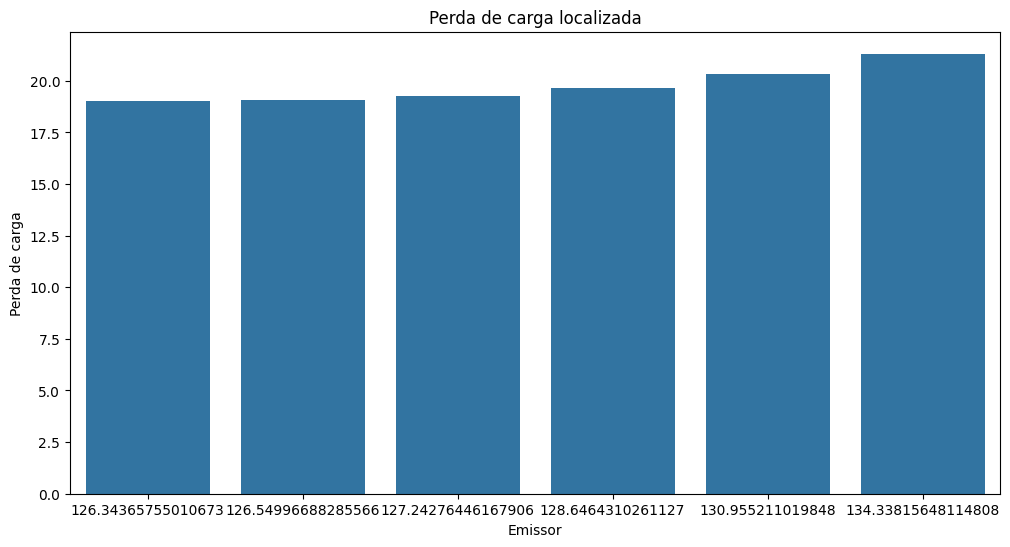

In [369]:
# gráfico de vazão 

import matplotlib.pyplot as plt
import seaborn as sns

n = [1, 2, 3, 4, 5, 6]
plt.figure(figsize=(12, 6))
sns.barplot(x='q', y='H', data = df, errorbar= None)
plt.title('Perda de carga localizada')
plt.xlabel('Emissor')
plt.ylabel('Perda de carga')
plt.show()